In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Dropping duplicating rows
df_unique = df.drop_duplicates().copy()

# Data cleaning
df_unique['job_posted_date'] = pd.to_datetime(df_unique['job_posted_date'])
df_unique['job_skills'] = df_unique['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter data for US only
df_US = df_unique[df_unique['job_country']== 'United States']

In [18]:
# Splitting the job_skills list into individual rows
df_skills = df_US.explode('job_skills')

In [19]:
#Grouping the skills and job titles that require that skillset
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values('skill_count', ascending=False, inplace=True)

In [38]:
job_titles = df_US['job_title_short'].value_counts().head(3).index.to_list()

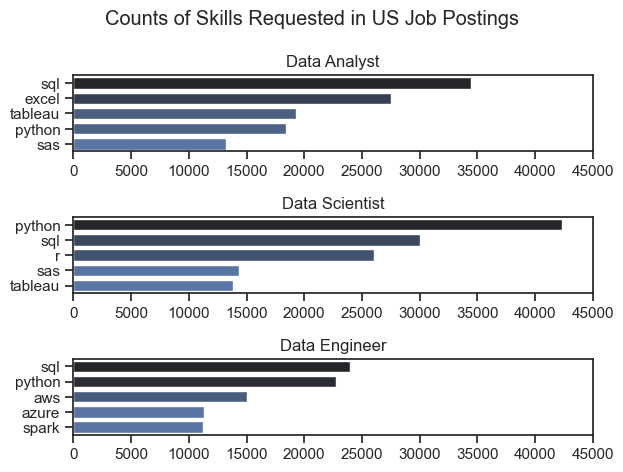

In [91]:
fig, ax = plt.subplots(len(job_titles),1)
ax: list[Axes]  # Type hint for ax

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', width=0.75)
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,45000)
 
fig.suptitle('Counts of Skills Requested in US Job Postings')
fig.tight_layout()
plt.show()

In [69]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_count

,job_title_short,jobs_total
0,Data Analyst,67814
1,Data Scientist,58828
2,Data Engineer,35080
3,Senior Data Scientist,12945
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [68]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42378
1521,sql,Data Analyst,34451
1523,sql,Data Scientist,30033
455,excel,Data Analyst,27518
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [72]:
df_skills_perc = pd.merge(df_skills_count,df_job_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count']/df_skills_perc['jobs_total'])*100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42378,58828,72.037125
1,sql,Data Analyst,34451,67814,50.802194
2,sql,Data Scientist,30033,58828,51.052220
3,excel,Data Analyst,27518,67814,40.578642
4,r,Data Scientist,26022,58828,44.234038
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12945,0.007725
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


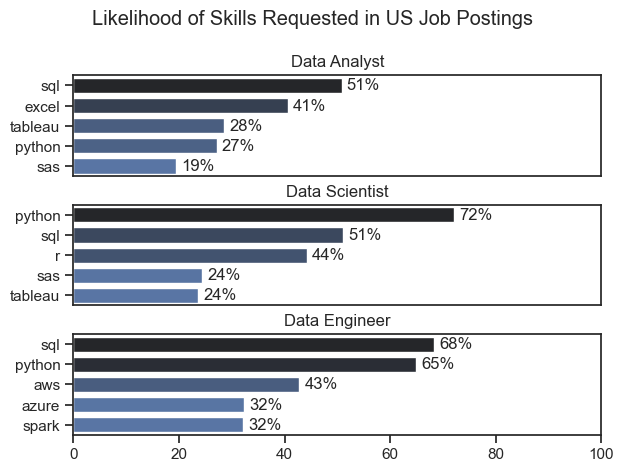

In [105]:
fig, ax = plt.subplots(len(job_titles),1)
ax: list[Axes]  # Type hint for ax

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', width=0.75)
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,100)
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
fig.suptitle('Likelihood of Skills Requested in US Job Postings')
fig.tight_layout(h_pad=0.5)
plt.show()